# chapter3 (신경망)

## 3.1 퍼셉트론에서 신경망으로

### 3.1.1 신경망의 예

신경망의 구조  
input layer -> hidden layer -> output layer  
신경망의 층 = len(hidden layer neuron)+ len(ouput layer neuron)

### 3.1.2 퍼셉트론 복습

y = 0 (-b + w1*x1 + w2*x2 =< 0)  
y = 1 (-b + w1*x1 + w2*x2 > 0)  
에서의 함수를 h(x) 라 하면  
h(x) = [
    0(x<=0),
    1(x>0)
]

### 3.1.3 활성화 함수의 등장

위의 함수 h(x) 처럼 입력 신호의 총합을 출력 신호로 변환하는 함수를 활성화함수(activation function)이라 한다.  
a = b + w1*x1 + w2*x2 -> input signal  
y = h(a) -> output signal

## 3.2 활성화 함수

퍼셉트론은 threshold 값을 경계로 output이 바뀌는 step function을 활성화 함수로 이용한다.

### 3.2.1 시그모이드 함수

sigmoid_function = h(x) = 1/(1+exp(-x))

### 3.2.2 계단 함수 구현하기

In [2]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [3]:
# numpy array를 input으로 받을 수 있게 수정
def step_function(x):
    y = x > 0
    return y.astype(np.int)

### 3.2.3 계단 함수의 그래프

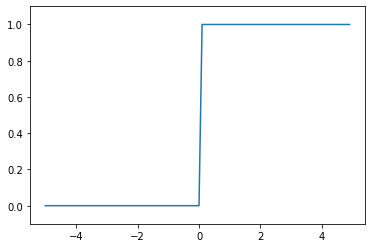

In [15]:
# plot step function
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.4 시그모이드 함수 구현하기

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

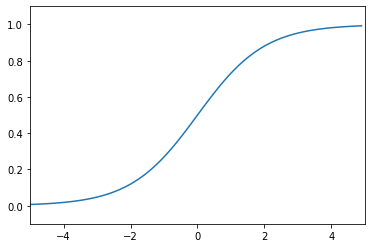

In [14]:
# plot sigmoid function

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.xlim(-5, 5)
plt.show()

### 3.2.5 시그모이드 함수와 계단 함수 비교

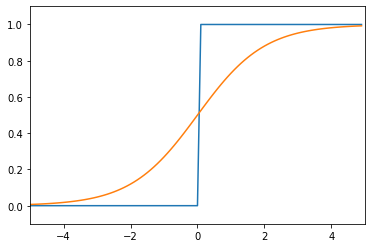

In [16]:
# diff step_function, sigmoid_function

x1 = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)
x2 = np.arange(-5.0, 5.0, 0.1)
y2 = sigmoid(x)

plt.ylim(-0.1, 1.1)
plt.xlim(-5, 5)

plt.plot(x1,y1)
plt.plot(x2, y2)
plt.show()

step_function : discontinuous function  
sigmoid_function : continuous function

### 3.2.6 비선형 함수

step_function과 sigmoid_function 모두 non-linear function이다.  
neural network에서는 activation function으로 non-linear function을 사용해야 한다.  
-> linear function을 사용하면 층을 깊게하는 의미가 없어진다.  
(input value가 linear function을 여러번 통과해도 결국 linear한 function을 통과하는 것과 같음)

### 3.2.7 ReLU 함수

ReLu : Rectified Linear Unit  
h(x) = [x(x>0), 0(x<=0)]

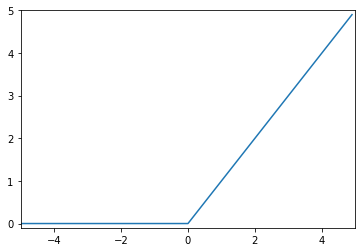

In [18]:
# plot ReLu function
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 5)
plt.xlim(-5, 5)
plt.show()

## 3.3 다차원 배열의 계산

### 3.3.1 다차원 배열

np.ndim() -> n dimension  
np.shape -> shape of matrix  
m_by_n_matrix.dot(n_by_a_matrix).shape == m_by_a_matrix

### 3.3.3 신경망에서의 행렬 곱

shape에 주의하며 구현해야함

## 3.4 3층 신경망 구현하기

### 3.4.1 표기법 설명

책 참고

### 3.4.2 각 층의 신호 전달 구현하기
### 3.4.3 구현 정리

In [19]:
def identity_function(x):
    return x

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
y

array([0.31682708, 0.69627909])

## 3.5 출력층 설계하기

output layer function  
regression : identity_function  
classification: softmax_function

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

항등함수: 입력과 출력이 같음  
소프트맥스 함수 : exp(a)/sum(exp(a)) -> 출력층의 각 뉴런이 모든 입력 신호에서 영향을 받음

In [20]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.2 소프트맥스 함수 구현 시 주의점

softmax function은 exp(a)의 값이 매우 커지면 overflow가 일어난다. 따라서 exp(a)를 log를 이용하여 적절히 변형시켜 주어야 한다.  
-> exp(a)/sum(exp(a)) -> C*exp(a)/C*sum(exp(a)) -> exp(a+log(C))/sum(exp(a+log(C)))  
-> exp(a+C`)/sum(exp(a+C`))


In [21]:
# prevent overflow
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [28]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
y, np.sum(y)

(array([0.01821127, 0.24519181, 0.73659691]), 1.0)

-> softmax의 output 총합은 1이 된다. -> output of softmax를 '확률'로 해석할 수 있다.

### 3.5.4 출력층의 뉴런 수 정하기

in classification : 분류 class 수만큼 출력층 뉴런을 set 해야 한다.

## 3.6 손글씨 숫자 인식

### 3.6.1 MNIST 데이터셋

In [70]:
from sklearn.model_selection import train_test_split
import pandas as pd

mnist_data = pd.read_csv('dataset/mnist_data.csv').to_numpy()[:,1:]
mnist_target = pd.read_csv('dataset/mnist_target.csv').to_numpy()[:, 1:].reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(mnist_data, mnist_target, test_size=1/7)

In [71]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((59999, 784), (59999,), (10000, 784), (10000,))

In [69]:
mnist_data.shape

(69999, 784)

4


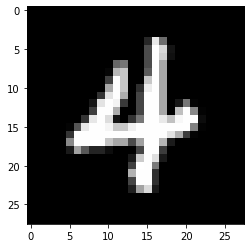

In [78]:
import matplotlib.pyplot as plt

def img_show(img):
    plt.imshow(img, cmap='gray')

img = X_train[0].reshape(28,28)
label = y_train[0]

img_show(img)
print(label)

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

def get_data():
    mnist_data = pd.read_csv('dataset/mnist_data.csv').to_numpy()[:,1:]/255.0 #255.0으로 안나누면 overflow 발생
    mnist_target = pd.read_csv('dataset/mnist_target.csv').to_numpy()[:, 1:].reshape(-1)

    X_train, X_test, y_train, y_test = train_test_split(mnist_data, mnist_target, test_size=1/7)

    return X_test, y_test

def init_network():
    with open('dataset/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)

    return network

def predict(network, X):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

In [83]:
X, t = get_data()
network = init_network()

accuracy_cnt = 0

for i in range(len(X)):
    y = predict(network, X[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print(f'accuracy: {str(float(accuracy_cnt)/len(X))}')

accuracy: 0.9397


### 3.6.3 배치 처리

In [86]:
# using batch
X, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(X), batch_size):
    X_batch = X[i:i+batch_size]
    y_batch = predict(network, X_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print(f'accuracy: {str(float(accuracy_cnt)/len(X))}')

accuracy: 0.9348


## 3.7 정리

-신경망에서는 활성화 함수로 매끄러운 함수 사용  
-배치 처리하면 빠른 연산 가능